# ÏúÑÍ∏∞ Ïú†ÌòïÎ≥Ñ Í∞ÄÎßπÏ†ê Î∂ÑÎ•ò ÏãúÏä§ÌÖú

## Î™©Ìëú
- All Interval Features Î™®Îç∏ÏùÑ ÌôúÏö©ÌïòÏó¨ Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†êÏùÑ **5Í∞ÄÏßÄ ÏúÑÍ∏∞ Ïú†Ìòï**ÏúºÎ°ú ÏûêÎèô Î∂ÑÎ•ò
- Ïú†ÌòïÎ≥Ñ ÎßûÏ∂§Ìòï Í∏àÏúµÏÉÅÌíà Î∞è Í∞úÏûÖ Ï†ÑÎûµ Ï†úÏïà
- SHAP Î∂ÑÏÑùÏùÑ ÌÜµÌïú Ïú†ÌòïÎ≥Ñ ÏúÑÌóò ÏöîÏù∏ ÌååÏïÖ

## 5Í∞ÄÏßÄ ÏúÑÍ∏∞ Ïú†Ìòï
1. **Îß§Ï∂ú Í∏âÎùΩÌòï**: Ïó∞ÏÜç ÌïòÎùΩ 3Í∞úÏõî Ïù¥ÏÉÅ, ÌïòÎùΩ ÏÜçÎèÑ Îπ†Î¶Ñ
2. **Í≥†Í∞ù Ïù¥ÌÉàÌòï**: Ïû¨Î∞©Î¨∏Ïú® ÏßÄÏÜç ÌïòÎùΩ, Ïã†Í∑ú Í≥†Í∞ù Ïú†ÏûÖ Í∞êÏÜå
3. **Î∞∞Îã¨ ÏùòÏ°¥Ìòï**: Î∞∞Îã¨ ÎπÑÏú® Ï¶ùÍ∞Ä + Ï¥ù Îß§Ï∂ú Í∞êÏÜå
4. **Í≤ΩÏüÅ Ïó¥ÏúÑÌòï**: ÏóÖÏ¢Ö/ÏÉÅÍ∂å ÏàúÏúÑ ÏßÄÏÜç ÌïòÎùΩ
5. **Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï**: Îß§Ï∂ú+Í≥†Í∞ù ÎèôÏãú ÌïòÎùΩ, Ïó≠ÎåÄ ÏµúÏïÖ ÎèÑÎã¨

## 1. ÌôòÍ≤Ω ÏÑ§Ï†ï

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# Ï∂úÎ†• ÏÑ§Ï†ï
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

print("‚úÖ Libraries loaded successfully")

‚úÖ Libraries loaded successfully


## 2. Îç∞Ïù¥ÌÑ∞ Î∞è Î™®Îç∏ Î°úÎìú

In [2]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú (All Interval Features Ìè¨Ìï®)
data_path = Path('../data/processed/featured_data_with_intervals.csv')
df = pd.read_csv(data_path)

print(f"‚úÖ Loaded data shape: {df.shape}")
print(f"Date range: {df['TA_YM'].min()} ~ {df['TA_YM'].max()}")

‚úÖ Loaded data shape: (86590, 148)
Date range: 202301 ~ 202412


In [3]:
# Interval feature Î™©Î°ù Î°úÎìú
with open('../data/processed/interval_feature_list.json', 'r') as f:
    interval_features_info = json.load(f)

print(f"‚úÖ Total interval features: {interval_features_info['total_features']}")
print(f"  - Decline features: {len(interval_features_info['decline_features'])}")
print(f"  - Historical worst features: {len(interval_features_info['historical_worst_features'])}")
print(f"  - Recovery features: {len(interval_features_info['recovery_features'])}")
print(f"  - Cross-metric features: {len(interval_features_info['cross_metric_features'])}")

‚úÖ Total interval features: 142
  - Decline features: 47
  - Historical worst features: 20
  - Recovery features: 28
  - Cross-metric features: 9


In [4]:
# Î™®Îç∏ Î∞è Feature Î™©Î°ù Î°úÎìú
model_dir = Path('../models')

# XGBoost All Interval Features Î™®Îç∏
with open(model_dir / 'xgboost_best.pkl', 'rb') as f:
    model = pickle.load(f)
print("‚úÖ Model loaded: XGBoost (All Interval Features)")

# Feature Î™©Î°ù
with open(model_dir / 'feature_cols.pkl', 'rb') as f:
    feature_cols = pickle.load(f)
print(f"‚úÖ Feature columns: {len(feature_cols)}")

# Î™®Îç∏ ÏÑ±Îä• ÌôïÏù∏
with open(model_dir / 'final_results.json', 'r') as f:
    results = json.load(f)

print(f"\nModel Performance (Test Set):")
print(f"  ROC-AUC: {results['test_roc_auc']:.4f}")
print(f"  PR-AUC: {results['test_pr_auc']:.4f}")
print(f"  Recall: {results['test_recall']:.4f}")
print(f"  Precision: {results['test_precision']:.4f}")

‚úÖ Model loaded: XGBoost (All Interval Features)
‚úÖ Feature columns: 134

Model Performance (Test Set):
  ROC-AUC: 0.6980
  PR-AUC: 0.0261
  Recall: 0.1818
  Precision: 0.0071


## 3. ÏµúÏã† Îç∞Ïù¥ÌÑ∞ ÌïÑÌÑ∞ÎßÅ Î∞è ÏúÑÌóòÎèÑ ÏòàÏ∏°

In [5]:
# ÏµúÏã† Ïõî Îç∞Ïù¥ÌÑ∞ (202412)
latest_month = df['TA_YM'].max()
print(f"Latest month: {latest_month}")

df_latest = df[df['TA_YM'] == latest_month].copy()
print(f"\nTotal merchants in {latest_month}: {len(df_latest):,}")

# ÏòÅÏóÖ Ï§ëÏù∏ Í∞ÄÎßπÏ†êÎßå ÌïÑÌÑ∞ÎßÅ (ÌèêÏóÖÏùºÏù¥ ÏóÜÎäî Í∞ÄÎßπÏ†ê)
df_active = df_latest[df_latest['MCT_ME_D'].isna()].copy()
print(f"Active merchants: {len(df_active):,}")
print(f"Closed merchants: {len(df_latest) - len(df_active):,}")

Latest month: 202412

Total merchants in 202412: 4,155
Active merchants: 4,058
Closed merchants: 97


In [6]:
# Feature Ï§ÄÎπÑ
X_active = df_active[feature_cols].copy()

# Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ (Ï§ëÏïôÍ∞í ÎåÄÏ≤¥)
X_active = X_active.fillna(X_active.median())

print(f"Prediction features shape: {X_active.shape}")
print(f"Missing values: {X_active.isnull().sum().sum()}")

Prediction features shape: (4058, 134)
Missing values: 0


In [7]:
# ÌèêÏóÖ ÌôïÎ•† ÏòàÏ∏°
closure_probabilities = model.predict_proba(X_active)[:, 1]

# Í≤∞Í≥º DataFrame ÏÉùÏÑ±
df_risk = df_active[['ENCODED_MCT', 'TA_YM', 'HPSN_MCT_BZN_CD_NM']].copy()
df_risk['closure_probability'] = closure_probabilities
df_risk['risk_score'] = (closure_probabilities * 100).astype(int)

# ÏúÑÌóòÎèÑ Îì±Í∏â
def get_risk_level(score):
    if score >= 80: return 'Very High'
    elif score >= 60: return 'High'
    elif score >= 40: return 'Medium'
    elif score >= 20: return 'Low'
    else: return 'Very Low'

df_risk['risk_level'] = df_risk['risk_score'].apply(get_risk_level)

print("‚úÖ Prediction completed")
print(f"\nRisk Score Statistics:")
print(df_risk['risk_score'].describe())
print(f"\nRisk Level Distribution:")
print(df_risk['risk_level'].value_counts())

‚úÖ Prediction completed

Risk Score Statistics:
count    4058.000000
mean        7.747413
std        11.319808
min         0.000000
25%         1.000000
50%         3.000000
75%         9.000000
max        84.000000
Name: risk_score, dtype: float64

Risk Level Distribution:
risk_level
Very Low     3566
Low           356
Medium        119
High           14
Very High       3
Name: count, dtype: int64


## 4. ÏúÑÍ∏∞ Ïú†Ìòï ÏûêÎèô Î∂ÑÎ•ò ÏãúÏä§ÌÖú üéØ

### Interval Pattern Features Í∏∞Î∞ò Î∂ÑÎ•ò Î°úÏßÅ

In [8]:
def classify_risk_type(merchant_idx):
    """
    Interval Pattern Features Í∏∞Î∞ò ÏúÑÍ∏∞ Ïú†Ìòï ÏûêÎèô Î∂ÑÎ•ò
    
    Returns:
        risk_type (str): ÏúÑÍ∏∞ Ïú†Ìòï
        priority (str): Ïö∞ÏÑ†ÏàúÏúÑ (critical/urgent/important/watch/normal)
        confidence (float): Î∂ÑÎ•ò Ïã†Î¢∞ÎèÑ (0-1)
    """
    row = X_active.loc[merchant_idx]
    
    # Helper functions
    def safe_get(col, default=0):
        """ÏïàÏ†ÑÌïòÍ≤å Ïª¨Îüº Í∞í Í∞ÄÏ†∏Ïò§Í∏∞"""
        return row.get(col, default) if col in row.index else default
    
    # Í∞Å Ïú†ÌòïÎ≥Ñ Ï†êÏàò Í≥ÑÏÇ∞ (0-100)
    scores = {
        'Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï': 0,
        'Îß§Ï∂ú Í∏âÎùΩÌòï': 0,
        'Í≥†Í∞ù Ïù¥ÌÉàÌòï': 0,
        'Î∞∞Îã¨ ÏùòÏ°¥Ìòï': 0,
        'Í≤ΩÏüÅ Ïó¥ÏúÑÌòï': 0
    }
    
    # ========== 1. Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï (Í∞ÄÏû• ÏπòÎ™ÖÏ†Å) ==========
    # Ï°∞Í±¥: Îß§Ï∂ú+Í≥†Í∞ù ÎèôÏãú ÌïòÎùΩ + Ïó¨Îü¨ ÏßÄÌëú Ïó≠ÎåÄ ÏµúÏïÖ
    if safe_get('aligned_decline_RC_M1_SAA_RC_M1_UE_CUS_CN') == 1:
        scores['Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï'] += 40
    
    # Ïó≠ÎåÄ ÏµúÏïÖ ÎèÑÎã¨ (Ïó¨Îü¨ ÏßÄÌëú)
    at_worst_count = (
        safe_get('RC_M1_SAA_at_worst_now') +
        safe_get('RC_M1_UE_CUS_CN_at_worst_now') +
        safe_get('RC_M1_TO_UE_CT_at_worst_now')
    )
    scores['Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï'] += min(at_worst_count * 15, 45)
    
    # Ïû•Í∏∞ Ïó∞ÏÜç ÌïòÎùΩ
    if safe_get('RC_M1_SAA_consecutive_declines') >= 4:
        scores['Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï'] += 15
    
    # ========== 2. Îß§Ï∂ú Í∏âÎùΩÌòï ==========
    # Ï°∞Í±¥: Ïó∞ÏÜç ÌïòÎùΩ 3Í∞úÏõî Ïù¥ÏÉÅ + ÌïòÎùΩ ÏÜçÎèÑ Îπ†Î¶Ñ
    consecutive_decline = safe_get('RC_M1_SAA_consecutive_declines')
    if consecutive_decline >= 3:
        scores['Îß§Ï∂ú Í∏âÎùΩÌòï'] += min(consecutive_decline * 10, 40)
    
    decline_speed = safe_get('RC_M1_SAA_decline_speed_3m')
    if decline_speed > 1.0:
        scores['Îß§Ï∂ú Í∏âÎùΩÌòï'] += min(decline_speed * 20, 40)
    
    # Ïó≠ÎåÄ ÏµúÏïÖ ÎèÑÎã¨
    if safe_get('RC_M1_SAA_at_worst_now') == 1:
        scores['Îß§Ï∂ú Í∏âÎùΩÌòï'] += 20
    
    # ========== 3. Í≥†Í∞ù Ïù¥ÌÉàÌòï ==========
    # Ï°∞Í±¥: Í≥†Í∞ù Ïàò ÏßÄÏÜç Í∞êÏÜå + Ïû¨Î∞©Î¨∏Ïú® ÌïòÎùΩ
    customer_decline = safe_get('RC_M1_UE_CUS_CN_consecutive_declines')
    if customer_decline >= 3:
        scores['Í≥†Í∞ù Ïù¥ÌÉàÌòï'] += min(customer_decline * 15, 50)
    
    # Ïû¨Î∞©Î¨∏Ïú® ÌïòÎùΩ (ÏõêÎ≥∏ feature ÌôúÏö©)
    if 'MCT_UE_CLN_REU_RAT' in row.index:
        reuse_rate = safe_get('MCT_UE_CLN_REU_RAT')
        if reuse_rate < 30:  # Ïû¨Î∞©Î¨∏Ïú® 30% ÎØ∏Îßå
            scores['Í≥†Í∞ù Ïù¥ÌÉàÌòï'] += 30
    
    # Í≥†Í∞ù Ïàò Ïó≠ÎåÄ ÏµúÏïÖ
    if safe_get('RC_M1_UE_CUS_CN_at_worst_now') == 1:
        scores['Í≥†Í∞ù Ïù¥ÌÉàÌòï'] += 20
    
    # ========== 4. Î∞∞Îã¨ ÏùòÏ°¥Ìòï ==========
    # Ï°∞Í±¥: Î∞∞Îã¨ ÎπÑÏú® ÎÜíÏùå + Ï†ÑÏ≤¥ Îß§Ï∂ú ÌïòÎùΩ
    delivery_ratio = safe_get('DLV_SAA_RAT')
    if delivery_ratio > 60:
        scores['Î∞∞Îã¨ ÏùòÏ°¥Ìòï'] += min((delivery_ratio - 60) * 2, 50)
    
    # Ï†ÑÏ≤¥ Îß§Ï∂ú ÌïòÎùΩ
    if safe_get('RC_M1_SAA_is_declining') == 1:
        scores['Î∞∞Îã¨ ÏùòÏ°¥Ìòï'] += 30
    
    # Í∞ùÎã®Í∞Ä ÌïòÎùΩ
    if safe_get('RC_M1_AV_NP_AT_consecutive_declines') >= 2:
        scores['Î∞∞Îã¨ ÏùòÏ°¥Ìòï'] += 20
    
    # ========== 5. Í≤ΩÏüÅ Ïó¥ÏúÑÌòï ==========
    # Ï°∞Í±¥: ÏóÖÏ¢Ö/ÏÉÅÍ∂å ÏàúÏúÑ ÌïòÎùΩ + ÏµúÍ≥† ÏÑ±Í≥º ÎåÄÎπÑ ÌÅ∞ ÌïòÎùΩ
    distance_from_best = safe_get('RC_M1_SAA_distance_from_best')
    if distance_from_best >= 3:
        scores['Í≤ΩÏüÅ Ïó¥ÏúÑÌòï'] += min(distance_from_best * 15, 60)
    
    # ÏµúÍ≥† ÏÑ±Í≥º Ïù¥ÌõÑ Ïû•Í∏∞Í∞Ñ Í≤ΩÍ≥º
    months_since_best = safe_get('RC_M1_SAA_months_since_best')
    if months_since_best >= 12:
        scores['Í≤ΩÏüÅ Ïó¥ÏúÑÌòï'] += 20
    
    # ÏóÖÏ¢Ö ÏàúÏúÑ ÌïòÎùΩ (ÏõêÎ≥∏ feature)
    if 'M12_SME_RY_SAA_PCE_RT' in row.index:
        industry_rank = safe_get('M12_SME_RY_SAA_PCE_RT')
        if industry_rank > 75:  # ÌïòÏúÑ 25%
            scores['Í≤ΩÏüÅ Ïó¥ÏúÑÌòï'] += 20
    
    # ========== ÏµúÏ¢Ö Î∂ÑÎ•ò ==========
    # Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÏùò Ïú†Ìòï ÏÑ†ÌÉù
    risk_type = max(scores, key=scores.get)
    max_score = scores[risk_type]
    confidence = min(max_score / 100, 1.0)
    
    # Ï†êÏàòÍ∞Ä ÎÇÆÏúºÎ©¥ 'Í∏∞ÌÉÄ ÏúÑÌóò'ÏúºÎ°ú Î∂ÑÎ•ò
    if max_score < 30:
        risk_type = 'Í∏∞ÌÉÄ ÏúÑÌóò'
        confidence = 0.0
    
    # Ïö∞ÏÑ†ÏàúÏúÑ Í≤∞Ï†ï
    priority_map = {
        'Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï': 'critical',
        'Îß§Ï∂ú Í∏âÎùΩÌòï': 'urgent',
        'Í≥†Í∞ù Ïù¥ÌÉàÌòï': 'important',
        'Î∞∞Îã¨ ÏùòÏ°¥Ìòï': 'watch',
        'Í≤ΩÏüÅ Ïó¥ÏúÑÌòï': 'watch',
        'Í∏∞ÌÉÄ ÏúÑÌóò': 'normal'
    }
    priority = priority_map[risk_type]
    
    return risk_type, priority, confidence, scores

print("‚úÖ Risk classification function defined")

‚úÖ Risk classification function defined


In [9]:
# Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†ê ÏúÑÍ∏∞ Ïú†Ìòï Î∂ÑÎ•ò (risk_score >= 60Îßå)
print("Classifying risk types for HIGH-RISK merchants only (risk_score >= 60)...")
print(f"Total merchants: {len(df_risk):,}")
print(f"High-risk merchants (score >= 60): {(df_risk['risk_score'] >= 60).sum():,}")

risk_types = []
priorities = []
confidences = []
all_scores = []

for idx in df_risk.index:
    risk_score = df_risk.loc[idx, 'risk_score']
    
    # Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†êÎßå ÏúÑÍ∏∞ Ïú†Ìòï Î∂ÑÎ•ò
    if risk_score >= 60:
        risk_type, priority, confidence, scores = classify_risk_type(idx)
        risk_types.append(risk_type)
        priorities.append(priority)
        confidences.append(confidence)
        all_scores.append(scores)
    else:
        # Ï†ÄÏúÑÌóò/Ï§ëÏúÑÌóò Í∞ÄÎßπÏ†êÏùÄ 'Ï†ïÏÉÅ'ÏúºÎ°ú Î∂ÑÎ•ò
        risk_types.append('Ï†ïÏÉÅ')
        priorities.append('normal')
        confidences.append(0.0)
        all_scores.append({})

df_risk['risk_type'] = risk_types
df_risk['priority'] = priorities
df_risk['classification_confidence'] = confidences

print("‚úÖ Risk type classification completed")
print(f"\nRisk Type Distribution:")
print(df_risk['risk_type'].value_counts())
print(f"\nHigh-Risk Type Breakdown (excluding 'Ï†ïÏÉÅ'):")
high_risk_types = df_risk[df_risk['risk_type'] != 'Ï†ïÏÉÅ']['risk_type'].value_counts()
if len(high_risk_types) > 0:
    print(high_risk_types)

Classifying risk types for HIGH-RISK merchants only (risk_score >= 60)...
Total merchants: 4,058
High-risk merchants (score >= 60): 17
‚úÖ Risk type classification completed

Risk Type Distribution:
risk_type
Ï†ïÏÉÅ        4041
Í≥†Í∞ù Ïù¥ÌÉàÌòï      10
Î∞∞Îã¨ ÏùòÏ°¥Ìòï       3
Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï       3
Í∏∞ÌÉÄ ÏúÑÌóò        1
Name: count, dtype: int64

High-Risk Type Breakdown (excluding 'Ï†ïÏÉÅ'):
risk_type
Í≥†Í∞ù Ïù¥ÌÉàÌòï    10
Î∞∞Îã¨ ÏùòÏ°¥Ìòï     3
Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï     3
Í∏∞ÌÉÄ ÏúÑÌóò      1
Name: count, dtype: int64


## 5. Ïú†ÌòïÎ≥Ñ ÌÜµÍ≥Ñ Î∂ÑÏÑù

In [10]:
# Ïú†ÌòïÎ≥Ñ Í∏∞Î≥∏ ÌÜµÍ≥Ñ
risk_type_stats = df_risk.groupby('risk_type').agg({
    'ENCODED_MCT': 'count',
    'risk_score': ['mean', 'median', 'std', 'min', 'max'],
    'closure_probability': ['mean', 'median'],
    'classification_confidence': 'mean'
}).round(2)

risk_type_stats.columns = ['_'.join(col).strip() for col in risk_type_stats.columns.values]
risk_type_stats = risk_type_stats.rename(columns={'ENCODED_MCT_count': 'merchant_count'})

print("Risk Type Statistics:")
print("=" * 100)
display(risk_type_stats.sort_values('risk_score_mean', ascending=False))

Risk Type Statistics:


merchant_count  risk_score_mean  risk_score_median  risk_score_std  \
risk_type                                                                       
Í∏∞ÌÉÄ ÏúÑÌóò                   1            81.00               81.0             NaN   
Í≥†Í∞ù Ïù¥ÌÉàÌòï                 10            69.50               68.5            7.59   
Î∞∞Îã¨ ÏùòÏ°¥Ìòï                  3            67.67               68.0            1.53   
Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï                  3            63.33               61.0            4.93   
Ï†ïÏÉÅ                   4041             7.49                3.0           10.62   

           risk_score_min  risk_score_max  closure_probability_mean  \
risk_type                                                             
Í∏∞ÌÉÄ ÏúÑÌóò                  81              81                      0.81   
Í≥†Í∞ù Ïù¥ÌÉàÌòï                 61              84                      0.70   
Î∞∞Îã¨ ÏùòÏ°¥Ìòï                 66              69                      0.68   
Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï                 60              69                      0.64   
Ï†ïÏÉÅ                      0              57                      0.08   

           closure_probability_median  classification_confidence_mean  
risk_type                                                              
Í∏∞ÌÉÄ ÏúÑÌóò                            0.81                            0.00  
Í≥†Í∞ù Ïù¥ÌÉàÌòï                           0.69                            0.46  
Î∞∞Îã¨ ÏùòÏ°¥Ìòï                           0.69                            0.47  
Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï                           0.61                            0.67  
Ï†ïÏÉÅ                               0.03                            0.00

In [11]:
# Ïö∞ÏÑ†ÏàúÏúÑÎ≥Ñ Î∂ÑÌè¨
priority_dist = df_risk.groupby('priority').agg({
    'ENCODED_MCT': 'count',
    'risk_score': 'mean'
}).round(2)
priority_dist.columns = ['merchant_count', 'avg_risk_score']

print("\nPriority Distribution:")
print("=" * 60)
priority_order = ['critical', 'urgent', 'important', 'watch', 'normal']
priority_dist = priority_dist.reindex(priority_order)
display(priority_dist)


Priority Distribution:


merchant_count  avg_risk_score
priority                                 
critical              3.0           63.33
urgent                NaN             NaN
important            10.0           69.50
watch                 3.0           67.67
normal             4042.0            7.51

## 6. Ïú†ÌòïÎ≥Ñ ÎßûÏ∂§Ìòï ÏÜîÎ£®ÏÖò Îß§Ïπ≠

In [12]:
# Ïú†ÌòïÎ≥Ñ ÏÜîÎ£®ÏÖò Ï†ïÏùò
risk_solution_map = {
    'Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï': {
        'solutions': [
            'Í∏¥Í∏â ÏïàÏ†ïÌôî Ìå®ÌÇ§ÏßÄ (Ïö¥ÏòÅÏûêÍ∏à + Ïª®ÏÑ§ÌåÖ)',
            'Íµ¨Ï°∞Ï°∞Ï†ï ÏßÄÏõê (Í≤ΩÏòÅ ÏßÑÎã® + Ï†ÑÎûµ ÏàòÎ¶Ω)',
            'Ïã†Ïö©Î≥¥Ï¶ù ÌäπÎ≥Ñ ÏßÄÏõê',
            'Ïö∞ÏÑ† Í¥ÄÎ¶¨ ÎåÄÏÉÅ ÏßÄÏ†ï'
        ],
        'priority': 'critical',
        'priority_kr': 'ÏµúÏö∞ÏÑ† Í∏¥Í∏â',
        'estimated_recovery_period': '6-12Í∞úÏõî',
        'intervention_timing': 'Ï¶âÏãú',
        'success_rate': '30-40%',
        'description': 'Ïó¨Îü¨ ÏßÄÌëúÍ∞Ä ÎèôÏãúÏóê ÏµúÏïÖ ÏÉÅÌÉú. Ï¶âÍ∞ÅÏ†ÅÏù¥Í≥† Í∞ïÎ†•Ìïú Í∞úÏûÖ ÌïÑÏöî'
    },
    'Îß§Ï∂ú Í∏âÎùΩÌòï': {
        'solutions': [
            'Îã®Í∏∞ Ïö¥ÏòÅÏûêÍ∏à ÎåÄÏ∂ú (Ï†ÄÍ∏àÎ¶¨)',
            'Í≤ΩÏòÅ Ïª®ÏÑ§ÌåÖ (Îß§Ï∂ú Î∂ÑÏÑù + Í∞úÏÑ†)',
            'ÎßàÏºÄÌåÖ ÏßÄÏõê ÌîÑÎ°úÍ∑∏Îû®',
            'ÏóÖÏ¢Ö Ï†ÑÌôò Ïª®ÏÑ§ÌåÖ'
        ],
        'priority': 'urgent',
        'priority_kr': 'Í∏¥Í∏â',
        'estimated_recovery_period': '3-6Í∞úÏõî',
        'intervention_timing': '1Ï£º Ïù¥ÎÇ¥',
        'success_rate': '50-60%',
        'description': 'Í∏âÍ≤©Ìïú Îß§Ï∂ú ÌïòÎùΩ. Îπ†Î•∏ ÏõêÏù∏ ÌååÏïÖÍ≥º ÎåÄÏùë Ï†ÑÎûµ ÏàòÎ¶Ω ÌïÑÏöî'
    },
    'Í≥†Í∞ù Ïù¥ÌÉàÌòï': {
        'solutions': [
            'Í≥†Í∞ù Î¶¨ÌÖêÏÖò ÌîÑÎ°úÍ∑∏Îû® ÏßÄÏõê',
            'ÎßàÏºÄÌåÖ ÏßÄÏõê ÎåÄÏ∂ú',
            'Í≥†Í∞ù Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏÑúÎπÑÏä§',
            'Ïû¨Î∞©Î¨∏ Ï∫†ÌéòÏù∏ Í∏∞Ìöç ÏßÄÏõê'
        ],
        'priority': 'important',
        'priority_kr': 'Ï§ëÏöî',
        'estimated_recovery_period': '6-9Í∞úÏõî',
        'intervention_timing': '2Ï£º Ïù¥ÎÇ¥',
        'success_rate': '60-70%',
        'description': 'Í≥†Í∞ù Ïù¥ÌÉà Í∞ÄÏÜçÌôî. Í≥†Í∞ù Í¥ÄÍ≥Ñ ÌöåÎ≥µ Î∞è Ïã†Í∑ú Ïú†Ïπò Ï†ÑÎûµ ÌïÑÏöî'
    },
    'Î∞∞Îã¨ ÏùòÏ°¥Ìòï': {
        'solutions': [
            'Ïò§ÌîÑÎùºÏù∏ Í≤ΩÏüÅÎ†• Í∞ïÌôî ÌîÑÎ°úÍ∑∏Îû®',
            'ÏÉÅÍ∂å Î∂ÑÏÑù Î∞è Ïû¨Ìè¨ÏßÄÏÖîÎãù',
            'Îß§Ïû• Î¶¨Îâ¥Ïñº ÏßÄÏõê',
            'Î∞∞Îã¨ ÏàòÏàòÎ£å ÏµúÏ†ÅÌôî Ïª®ÏÑ§ÌåÖ'
        ],
        'priority': 'watch',
        'priority_kr': 'Í¥ÄÏ∞∞ ÌïÑÏöî',
        'estimated_recovery_period': '9-12Í∞úÏõî',
        'intervention_timing': '1Í∞úÏõî Ïù¥ÎÇ¥',
        'success_rate': '50-60%',
        'description': 'Î∞∞Îã¨ Í≥ºÏùòÏ°¥ÏúºÎ°ú ÏàòÏùµÏÑ± ÏïÖÌôî. Ïò§ÌîÑÎùºÏù∏ Í∞ïÌôî Î∞è ÏàòÏùµ Íµ¨Ï°∞ Í∞úÏÑ† ÌïÑÏöî'
    },
    'Í≤ΩÏüÅ Ïó¥ÏúÑÌòï': {
        'solutions': [
            'Í≤ΩÏüÅÎ†• Í∞ïÌôî Ìå®ÌÇ§ÏßÄ',
            'Ï∞®Î≥ÑÌôî Ï†ÑÎûµ ÏàòÎ¶Ω Ïª®ÏÑ§ÌåÖ',
            'ÏóÖÏ¢Ö/ÏÉÅÍ∂å Î∂ÑÏÑù ÏÑúÎπÑÏä§',
            'Î©îÎâ¥ Í∞úÎ∞ú Î∞è ÌíàÏßà Í∞úÏÑ† ÏßÄÏõê'
        ],
        'priority': 'watch',
        'priority_kr': 'Í¥ÄÏ∞∞ ÌïÑÏöî',
        'estimated_recovery_period': '6-12Í∞úÏõî',
        'intervention_timing': '1Í∞úÏõî Ïù¥ÎÇ¥',
        'success_rate': '40-50%',
        'description': 'ÏãúÏû• ÎÇ¥ Í≤ΩÏüÅÎ†• ÏïΩÌôî. Ï∞®Î≥ÑÌôî Î∞è Ìè¨ÏßÄÏÖîÎãù Ïû¨Ï†ïÎ¶Ω ÌïÑÏöî'
    },
    'Ï†ïÏÉÅ': {
        'solutions': [
            'Ï†ïÍ∏∞ Î™®ÎãàÌÑ∞ÎßÅ',
            'ÏòàÎ∞©Ï†Å Í≤ΩÏòÅ ÏßÑÎã®',
            'Ïö∞Ïàò Í≤ΩÏòÅ ÏÇ¨Î°Ä Í≥µÏú†',
            'Ïû•Í∏∞ ÏÑ±Ïû• ÏßÄÏõê ÌîÑÎ°úÍ∑∏Îû®'
        ],
        'priority': 'normal',
        'priority_kr': 'Ï†ïÏÉÅ',
        'estimated_recovery_period': 'N/A',
        'intervention_timing': 'Ï†ïÍ∏∞ Ï†êÍ≤Ä',
        'success_rate': 'N/A',
        'description': 'ÏúÑÌóòÎèÑ ÎÇÆÏùå (risk_score < 60). Ï†ïÍ∏∞ Î™®ÎãàÌÑ∞ÎßÅ Î∞è ÏòàÎ∞©Ï†Å Í¥ÄÎ¶¨'
    },
    'Í∏∞ÌÉÄ ÏúÑÌóò': {
        'solutions': [
            'Ï†ïÍ∏∞ Î™®ÎãàÌÑ∞ÎßÅ',
            'ÏòàÎ∞©Ï†Å Í≤ΩÏòÅ ÏßÑÎã®',
            'ÏóÖÏ¢ÖÎ≥Ñ Î¶¨Ïä§ÌÅ¨ ÍµêÏú°'
        ],
        'priority': 'normal',
        'priority_kr': 'Í∏∞ÌÉÄ',
        'estimated_recovery_period': 'N/A',
        'intervention_timing': 'Ï†ïÍ∏∞ Ï†êÍ≤Ä',
        'success_rate': 'N/A',
        'description': 'Í≥†ÏúÑÌóòÏù¥ÏßÄÎßå Î™ÖÌôïÌïú ÏúÑÌóò Ìå®ÌÑ¥ ÎØ∏Í∞êÏßÄ. Ï†ïÍ∏∞ Î™®ÎãàÌÑ∞ÎßÅ ÏßÄÏÜç'
    }
}

# DataFrameÏúºÎ°ú Î≥ÄÌôò
solution_df = pd.DataFrame(risk_solution_map).T
solution_df['solutions_text'] = solution_df['solutions'].apply(lambda x: '\n'.join([f'{i+1}. {s}' for i, s in enumerate(x)]))

print("‚úÖ Risk solutions mapped")
print("\nRisk Type Solutions:")
print("=" * 100)
for risk_type, info in risk_solution_map.items():
    count = (df_risk['risk_type'] == risk_type).sum()
    print(f"\n[{risk_type}] ({count:,} Í∞ÄÎßπÏ†ê) - {info['priority_kr']}")
    print(f"  {info['description']}")
    print(f"  ÌöåÎ≥µ Í∏∞Í∞Ñ: {info['estimated_recovery_period']} | Í∞úÏûÖ ÏãúÏ†ê: {info['intervention_timing']} | ÏÑ±Í≥µÎ•†: {info['success_rate']}")
    print(f"  ÏÜîÎ£®ÏÖò:")
    for i, sol in enumerate(info['solutions'], 1):
        print(f"    {i}. {sol}")

‚úÖ Risk solutions mapped

Risk Type Solutions:

[Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï] (3 Í∞ÄÎßπÏ†ê) - ÏµúÏö∞ÏÑ† Í∏¥Í∏â
  Ïó¨Îü¨ ÏßÄÌëúÍ∞Ä ÎèôÏãúÏóê ÏµúÏïÖ ÏÉÅÌÉú. Ï¶âÍ∞ÅÏ†ÅÏù¥Í≥† Í∞ïÎ†•Ìïú Í∞úÏûÖ ÌïÑÏöî
  ÌöåÎ≥µ Í∏∞Í∞Ñ: 6-12Í∞úÏõî | Í∞úÏûÖ ÏãúÏ†ê: Ï¶âÏãú | ÏÑ±Í≥µÎ•†: 30-40%
  ÏÜîÎ£®ÏÖò:
    1. Í∏¥Í∏â ÏïàÏ†ïÌôî Ìå®ÌÇ§ÏßÄ (Ïö¥ÏòÅÏûêÍ∏à + Ïª®ÏÑ§ÌåÖ)
    2. Íµ¨Ï°∞Ï°∞Ï†ï ÏßÄÏõê (Í≤ΩÏòÅ ÏßÑÎã® + Ï†ÑÎûµ ÏàòÎ¶Ω)
    3. Ïã†Ïö©Î≥¥Ï¶ù ÌäπÎ≥Ñ ÏßÄÏõê
    4. Ïö∞ÏÑ† Í¥ÄÎ¶¨ ÎåÄÏÉÅ ÏßÄÏ†ï

[Îß§Ï∂ú Í∏âÎùΩÌòï] (0 Í∞ÄÎßπÏ†ê) - Í∏¥Í∏â
  Í∏âÍ≤©Ìïú Îß§Ï∂ú ÌïòÎùΩ. Îπ†Î•∏ ÏõêÏù∏ ÌååÏïÖÍ≥º ÎåÄÏùë Ï†ÑÎûµ ÏàòÎ¶Ω ÌïÑÏöî
  ÌöåÎ≥µ Í∏∞Í∞Ñ: 3-6Í∞úÏõî | Í∞úÏûÖ ÏãúÏ†ê: 1Ï£º Ïù¥ÎÇ¥ | ÏÑ±Í≥µÎ•†: 50-60%
  ÏÜîÎ£®ÏÖò:
    1. Îã®Í∏∞ Ïö¥ÏòÅÏûêÍ∏à ÎåÄÏ∂ú (Ï†ÄÍ∏àÎ¶¨)
    2. Í≤ΩÏòÅ Ïª®ÏÑ§ÌåÖ (Îß§Ï∂ú Î∂ÑÏÑù + Í∞úÏÑ†)
    3. ÎßàÏºÄÌåÖ ÏßÄÏõê ÌîÑÎ°úÍ∑∏Îû®
    4. ÏóÖÏ¢Ö Ï†ÑÌôò Ïª®ÏÑ§ÌåÖ

[Í≥†Í∞ù Ïù¥ÌÉàÌòï] (10 Í∞ÄÎßπÏ†ê) - Ï§ëÏöî
  Í≥†Í∞ù Ïù¥ÌÉà Í∞ÄÏÜçÌôî. Í≥†Í∞ù Í¥ÄÍ≥Ñ ÌöåÎ≥µ Î∞è Ïã†Í∑ú Ïú†Ïπò Ï†ÑÎûµ ÌïÑÏöî
  ÌöåÎ≥µ Í∏∞Í∞Ñ: 6-9Í∞úÏõî | Í∞úÏûÖ ÏãúÏ†ê:

## 7. Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†ê ÏÉÅÏÑ∏ Î∂ÑÏÑù

In [13]:
# Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†ê (risk_score >= 60)
high_risk = df_risk[df_risk['risk_score'] >= 60].copy()
high_risk = high_risk.sort_values('risk_score', ascending=False)

print(f"High Risk Merchants (score >= 60): {len(high_risk):,}")
print(f"\nRisk Type Breakdown:")
print(high_risk['risk_type'].value_counts())

print(f"\nTop 20 Highest Risk Merchants:")
print("=" * 100)
display(high_risk[[
    'ENCODED_MCT', 'HPSN_MCT_BZN_CD_NM', 'risk_score', 'risk_type', 
    'priority', 'classification_confidence'
]].head(20))

High Risk Merchants (score >= 60): 17

Risk Type Breakdown:
risk_type
Í≥†Í∞ù Ïù¥ÌÉàÌòï    10
Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï     3
Î∞∞Îã¨ ÏùòÏ°¥Ìòï     3
Í∏∞ÌÉÄ ÏúÑÌóò      1
Name: count, dtype: int64

Top 20 Highest Risk Merchants:


ENCODED_MCT HPSN_MCT_BZN_CD_NM  risk_score risk_type   priority  \
9119   1A9644F28E                NaN          84    Í≥†Í∞ù Ïù¥ÌÉàÌòï  important   
2413   06A87DAA45                 ÎöùÏÑ¨          81     Í∏∞ÌÉÄ ÏúÑÌóò     normal   
13109  259546987D                ÏôïÏã≠Î¶¨          80    Í≥†Í∞ù Ïù¥ÌÉàÌòï  important   
74340  DD45EECEE3                NaN          72    Í≥†Í∞ù Ïù¥ÌÉàÌòï  important   
41811  790D3285E3                NaN          69    Í≥†Í∞ù Ïù¥ÌÉàÌòï  important   
64961  BF88DF05E7                ÏôïÏã≠Î¶¨          69    Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï   critical   
67137  C56839C38F                 ÎöùÏÑ¨          69    Í≥†Í∞ù Ïù¥ÌÉàÌòï  important   
50176  932F4562E9                ÏôïÏã≠Î¶¨          69    Î∞∞Îã¨ ÏùòÏ°¥Ìòï      watch   
3913   0B36DDFB1B                ÏôïÏã≠Î¶¨          68    Í≥†Í∞ù Ïù¥ÌÉàÌòï  important   
50692  94795C00AE                 ÏÑ±Ïàò          68    Í≥†Í∞ù Ïù¥ÌÉàÌòï  important   
9191   1ABAFAF53E                ÏôïÏã≠Î¶¨          68    Î∞∞Îã¨ ÏùòÏ°¥Ìòï      watch   
28358  50CCBE90E1                NaN          66    Î∞∞Îã¨ ÏùòÏ°¥Ìòï      watch   
26491  4CAFD6C3F4                ÏôïÏã≠Î¶¨          63    Í≥†Í∞ù Ïù¥ÌÉàÌòï  important   
24090  44A9291640                 ÏÑ±Ïàò          61    Í≥†Í∞ù Ïù¥ÌÉàÌòï  important   
74346  DD4FCA5BE6                NaN          61    Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï   critical   
86424  FF55272DEB                 ÎöùÏÑ¨          61    Í≥†Í∞ù Ïù¥ÌÉàÌòï  important   
83761  F7E9A69F8D                NaN          60    Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï   critical   

       classification_confidence  
9119                       0.500  
2413                       0.000  
13109                      0.500  
74340                      0.500  
41811                      0.300  
64961                      0.850  
67137                      0.500  
50176                      0.500  
3913                       0.500  
50692                      0.500  
9191                       0.418  
28358                      0.500  
26491                      0.500  
24090                      0.300  
74346                      0.300  
86424                      0.500  
83761                      0.850

In [14]:
# Ïú†ÌòïÎ≥Ñ ÏÉòÌîå Í∞ÄÎßπÏ†ê Î∂ÑÏÑù (Í≥†ÏúÑÌóò Ïú†ÌòïÎßå)
print("Sample Merchants by Risk Type (High-Risk Only):")
print("=" * 100)

for risk_type in ['Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï', 'Îß§Ï∂ú Í∏âÎùΩÌòï', 'Í≥†Í∞ù Ïù¥ÌÉàÌòï', 'Î∞∞Îã¨ ÏùòÏ°¥Ìòï', 'Í≤ΩÏüÅ Ïó¥ÏúÑÌòï']:
    type_merchants = df_risk[df_risk['risk_type'] == risk_type].sort_values('risk_score', ascending=False)
    
    if len(type_merchants) > 0:
        print(f"\n[{risk_type}] Top 3 Merchants:")
        print("-" * 100)
        
        for i, (idx, row) in enumerate(type_merchants.head(3).iterrows(), 1):
            merchant_id = row['ENCODED_MCT']
            category = row['HPSN_MCT_BZN_CD_NM']
            risk_score = row['risk_score']
            confidence = row['classification_confidence']
            
            print(f"{i}. {merchant_id} | {category} | Risk: {risk_score} | Confidence: {confidence:.2f}")
            
            # Ï£ºÏöî ÏßÄÌëú Ï∂úÎ†•
            merchant_features = X_active.loc[idx]
            
            if risk_type == 'Îß§Ï∂ú Í∏âÎùΩÌòï':
                decline = merchant_features.get('RC_M1_SAA_consecutive_declines', 0)
                speed = merchant_features.get('RC_M1_SAA_decline_speed_3m', 0)
                print(f"   Ïó∞ÏÜç ÌïòÎùΩ: {decline:.0f}Í∞úÏõî | ÌïòÎùΩ ÏÜçÎèÑ: {speed:.2f}")
            
            elif risk_type == 'Í≥†Í∞ù Ïù¥ÌÉàÌòï':
                cust_decline = merchant_features.get('RC_M1_UE_CUS_CN_consecutive_declines', 0)
                reuse = merchant_features.get('MCT_UE_CLN_REU_RAT', 0)
                print(f"   Í≥†Í∞ù Ïó∞ÏÜç ÌïòÎùΩ: {cust_decline:.0f}Í∞úÏõî | Ïû¨Î∞©Î¨∏Ïú®: {reuse:.1f}%")
            
            elif risk_type == 'Î∞∞Îã¨ ÏùòÏ°¥Ìòï':
                delivery = merchant_features.get('DLV_SAA_RAT', 0)
                declining = merchant_features.get('RC_M1_SAA_is_declining', 0)
                print(f"   Î∞∞Îã¨ ÎπÑÏú®: {delivery:.1f}% | Îß§Ï∂ú ÌïòÎùΩ Ï§ë: {'Ïòà' if declining else 'ÏïÑÎãàÏò§'}")
            
            elif risk_type == 'Í≤ΩÏüÅ Ïó¥ÏúÑÌòï':
                distance = merchant_features.get('RC_M1_SAA_distance_from_best', 0)
                months = merchant_features.get('RC_M1_SAA_months_since_best', 0)
                print(f"   ÏµúÍ≥†Ï†ê ÎåÄÎπÑ ÌïòÎùΩ: {distance:.0f}Îã®Í≥Ñ | ÏµúÍ≥† Ïù¥ÌõÑ: {months:.0f}Í∞úÏõî")
            
            elif risk_type == 'Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï':
                aligned = merchant_features.get('aligned_decline_RC_M1_SAA_RC_M1_UE_CUS_CN', 0)
                at_worst_sales = merchant_features.get('RC_M1_SAA_at_worst_now', 0)
                at_worst_cust = merchant_features.get('RC_M1_UE_CUS_CN_at_worst_now', 0)
                print(f"   ÎèôÏãú ÌïòÎùΩ: {'Ïòà' if aligned else 'ÏïÑÎãàÏò§'} | Îß§Ï∂ú ÏµúÏïÖ: {'Ïòà' if at_worst_sales else 'ÏïÑÎãàÏò§'} | Í≥†Í∞ù ÏµúÏïÖ: {'Ïòà' if at_worst_cust else 'ÏïÑÎãàÏò§'}")
    else:
        print(f"\n[{risk_type}] No merchants classified")

# Ï†ïÏÉÅ Í∞ÄÎßπÏ†ê ÌÜµÍ≥Ñ
normal_count = (df_risk['risk_type'] == 'Ï†ïÏÉÅ').sum()
print(f"\n\n[Ï†ïÏÉÅ] {normal_count:,} Í∞ÄÎßπÏ†ê")
print("  ÏúÑÌóòÎèÑ ÎÇÆÏùå (risk_score < 60). Ï†ïÍ∏∞ Î™®ÎãàÌÑ∞ÎßÅ Î∞è ÏòàÎ∞©Ï†Å Í¥ÄÎ¶¨")

Sample Merchants by Risk Type (High-Risk Only):

[Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï] Top 3 Merchants:
----------------------------------------------------------------------------------------------------
1. BF88DF05E7 | ÏôïÏã≠Î¶¨ | Risk: 69 | Confidence: 0.85
   ÎèôÏãú ÌïòÎùΩ: Ïòà | Îß§Ï∂ú ÏµúÏïÖ: Ïòà | Í≥†Í∞ù ÏµúÏïÖ: Ïòà
2. DD4FCA5BE6 | nan | Risk: 61 | Confidence: 0.30
   ÎèôÏãú ÌïòÎùΩ: ÏïÑÎãàÏò§ | Îß§Ï∂ú ÏµúÏïÖ: ÏïÑÎãàÏò§ | Í≥†Í∞ù ÏµúÏïÖ: Ïòà
3. F7E9A69F8D | nan | Risk: 60 | Confidence: 0.85
   ÎèôÏãú ÌïòÎùΩ: Ïòà | Îß§Ï∂ú ÏµúÏïÖ: Ïòà | Í≥†Í∞ù ÏµúÏïÖ: Ïòà

[Îß§Ï∂ú Í∏âÎùΩÌòï] No merchants classified

[Í≥†Í∞ù Ïù¥ÌÉàÌòï] Top 3 Merchants:
----------------------------------------------------------------------------------------------------
1. 1A9644F28E | nan | Risk: 84 | Confidence: 0.50
   Í≥†Í∞ù Ïó∞ÏÜç ÌïòÎùΩ: 0Í∞úÏõî | Ïû¨Î∞©Î¨∏Ïú®: 24.4%
2. 259546987D | ÏôïÏã≠Î¶¨ | Risk: 80 | Confidence: 0.50
   Í≥†Í∞ù Ïó∞ÏÜç ÌïòÎùΩ: 0Í∞úÏõî | Ïû¨Î∞©Î¨∏Ïú®: 24.4%
3. DD45EECEE3 | nan | Risk: 72 | Confidence: 0.50
   Í≥†

## 8. ÏãúÍ∞ÅÌôî

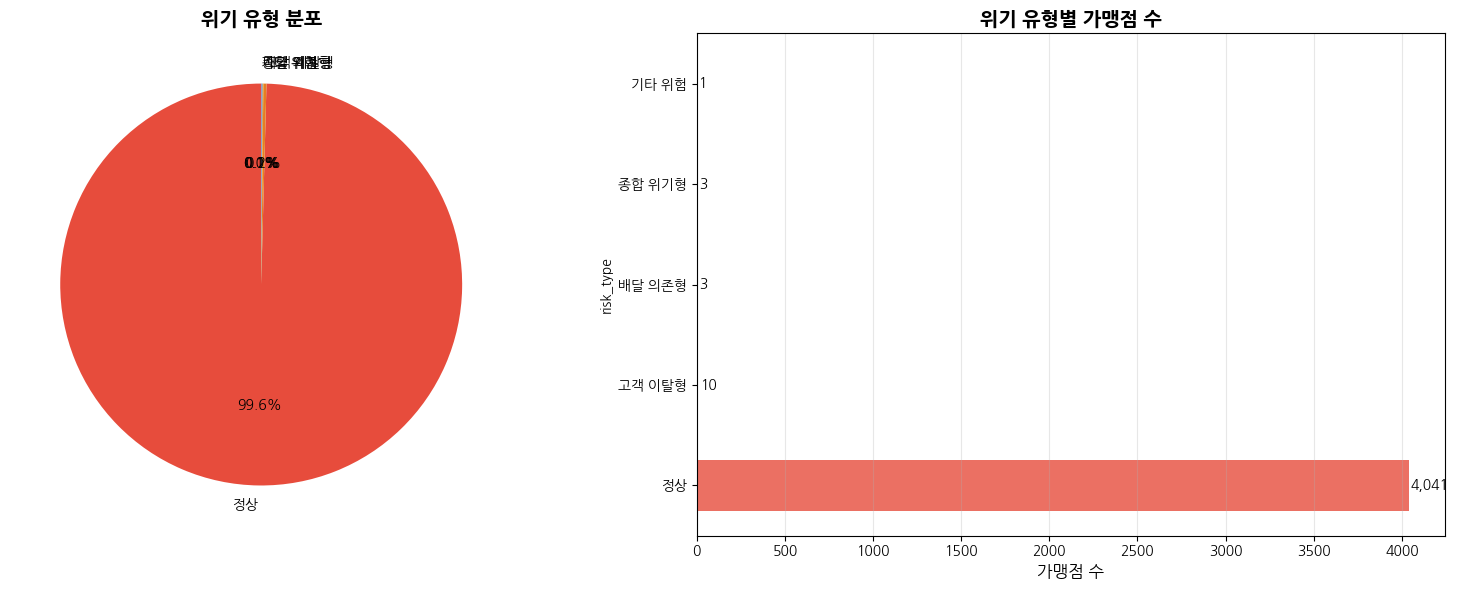

‚úÖ Saved: ../results/risk_type_distribution.png


In [15]:
# Ï∂úÎ†• ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ± (ÏãúÍ∞ÅÌôî Ï†ÄÏû•Ïö©)
output_dir = Path('../results')
output_dir.mkdir(exist_ok=True)

# ÏãúÍ∞ÅÌôî 1: ÏúÑÍ∏∞ Ïú†Ìòï Î∂ÑÌè¨
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
risk_type_counts = df_risk['risk_type'].value_counts()
colors = ['#e74c3c', '#e67e22', '#f39c12', '#3498db', '#9b59b6', '#95a5a6']
axes[0].pie(risk_type_counts, labels=risk_type_counts.index, autopct='%1.1f%%',
            colors=colors[:len(risk_type_counts)], startangle=90)
axes[0].set_title('ÏúÑÍ∏∞ Ïú†Ìòï Î∂ÑÌè¨', fontsize=14, fontweight='bold')

# Bar chart
risk_type_counts.plot(kind='barh', ax=axes[1], color=colors[:len(risk_type_counts)], alpha=0.8)
axes[1].set_xlabel('Í∞ÄÎßπÏ†ê Ïàò', fontsize=12)
axes[1].set_title('ÏúÑÍ∏∞ Ïú†ÌòïÎ≥Ñ Í∞ÄÎßπÏ†ê Ïàò', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

for i, v in enumerate(risk_type_counts):
    axes[1].text(v + 10, i, f'{v:,}', va='center')

plt.tight_layout()
plt.savefig(output_dir / 'risk_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"‚úÖ Saved: {output_dir / 'risk_type_distribution.png'}")

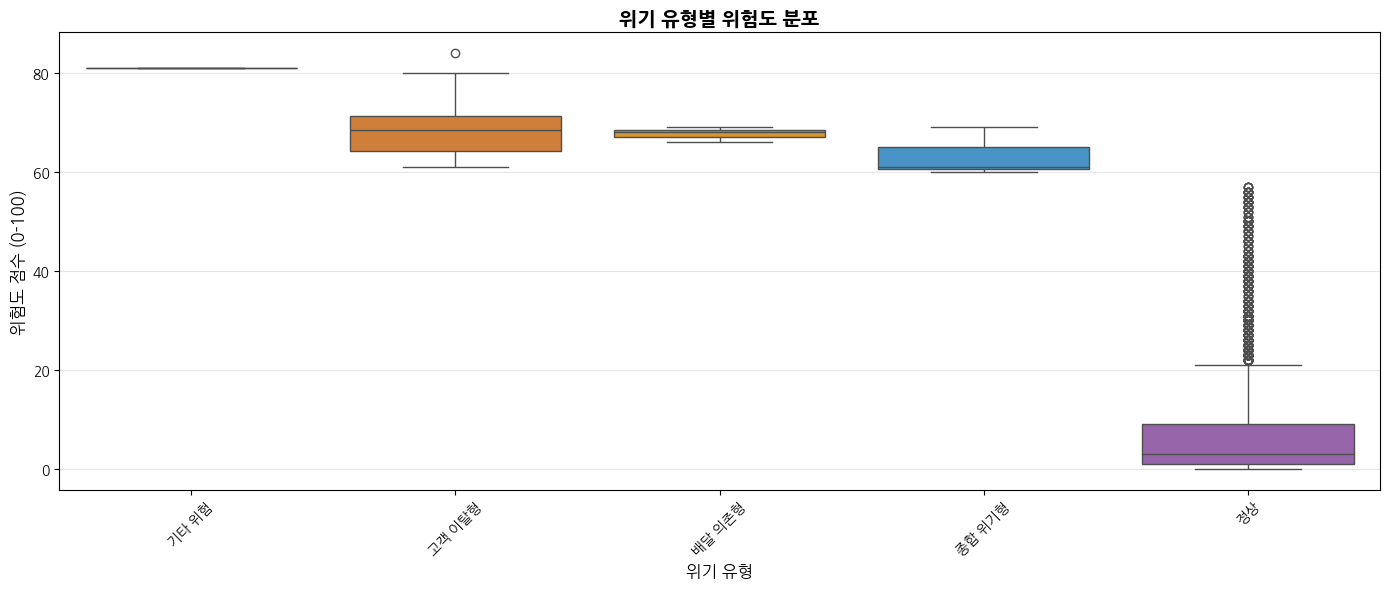

‚úÖ Saved: ../results/risk_type_score_distribution.png


In [16]:
# ÏãúÍ∞ÅÌôî 2: Ïú†ÌòïÎ≥Ñ ÏúÑÌóòÎèÑ Î∂ÑÌè¨ (Boxplot)
fig, ax = plt.subplots(figsize=(14, 6))

# Ïú†ÌòïÎ≥Ñ Ï†ïÎ†¨ (ÌèâÍ∑† ÏúÑÌóòÎèÑ ÎÜíÏùÄ Ïàú)
type_order = df_risk.groupby('risk_type')['risk_score'].mean().sort_values(ascending=False).index

sns.boxplot(data=df_risk, x='risk_type', y='risk_score', order=type_order,
            palette=colors[:len(type_order)], ax=ax)
ax.set_xlabel('ÏúÑÍ∏∞ Ïú†Ìòï', fontsize=12)
ax.set_ylabel('ÏúÑÌóòÎèÑ Ï†êÏàò (0-100)', fontsize=12)
ax.set_title('ÏúÑÍ∏∞ Ïú†ÌòïÎ≥Ñ ÏúÑÌóòÎèÑ Î∂ÑÌè¨', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig(output_dir / 'risk_type_score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"‚úÖ Saved: {output_dir / 'risk_type_score_distribution.png'}")

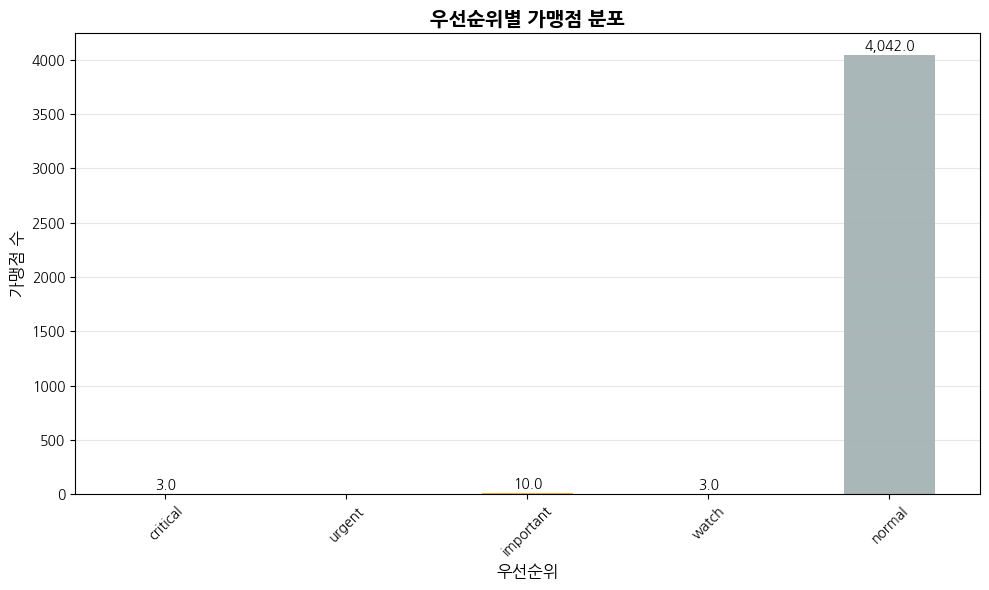

‚úÖ Saved: ../results/priority_distribution.png


In [17]:
# ÏãúÍ∞ÅÌôî 3: Ïö∞ÏÑ†ÏàúÏúÑÎ≥Ñ Î∂ÑÌè¨
fig, ax = plt.subplots(figsize=(10, 6))

priority_counts = df_risk['priority'].value_counts().reindex(priority_order)
priority_colors = {'critical': '#e74c3c', 'urgent': '#e67e22', 'important': '#f39c12',
                  'watch': '#3498db', 'normal': '#95a5a6'}
colors_list = [priority_colors[p] for p in priority_order]

priority_counts.plot(kind='bar', ax=ax, color=colors_list, alpha=0.8)
ax.set_xlabel('Ïö∞ÏÑ†ÏàúÏúÑ', fontsize=12)
ax.set_ylabel('Í∞ÄÎßπÏ†ê Ïàò', fontsize=12)
ax.set_title('Ïö∞ÏÑ†ÏàúÏúÑÎ≥Ñ Í∞ÄÎßπÏ†ê Î∂ÑÌè¨', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y', alpha=0.3)

for i, v in enumerate(priority_counts):
    ax.text(i, v + 20, f'{v:,}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig(output_dir / 'priority_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"‚úÖ Saved: {output_dir / 'priority_distribution.png'}")

## 9. Í≤∞Í≥º Ï†ÄÏû•

In [18]:
# Í≤∞Í≥º Ï†ÄÏû• (output_dirÏùÄ Ïù¥ÎØ∏ ÏãúÍ∞ÅÌôî ÏÑπÏÖòÏóêÏÑú ÏÉùÏÑ±Îê®)

# 1. Ï†ÑÏ≤¥ Î∂ÑÎ•ò Í≤∞Í≥º Ï†ÄÏû•
df_risk_full = df_risk.sort_values('risk_score', ascending=False)
df_risk_full.to_csv(output_dir / 'risk_classification_results.csv', index=False, encoding='utf-8-sig')
print(f"‚úÖ Saved: {output_dir / 'risk_classification_results.csv'}")
print(f"   Total merchants: {len(df_risk_full):,}")

# 2. Ïú†ÌòïÎ≥Ñ ÌÜµÍ≥Ñ Ï†ÄÏû•
risk_type_statistics = {
    'summary': {
        'total_merchants': int(len(df_risk)),
        'prediction_date': str(latest_month),
        'risk_types': list(df_risk['risk_type'].unique())
    },
    'type_distribution': df_risk['risk_type'].value_counts().to_dict(),
    'priority_distribution': df_risk['priority'].value_counts().to_dict(),
    'type_statistics': {}
}

for risk_type in df_risk['risk_type'].unique():
    type_data = df_risk[df_risk['risk_type'] == risk_type]
    risk_type_statistics['type_statistics'][risk_type] = {
        'count': int(len(type_data)),
        'avg_risk_score': float(type_data['risk_score'].mean()),
        'median_risk_score': float(type_data['risk_score'].median()),
        'avg_closure_probability': float(type_data['closure_probability'].mean()),
        'avg_confidence': float(type_data['classification_confidence'].mean())
    }

with open(output_dir / 'risk_type_statistics.json', 'w', encoding='utf-8') as f:
    json.dump(risk_type_statistics, f, indent=2, ensure_ascii=False)
print(f"‚úÖ Saved: {output_dir / 'risk_type_statistics.json'}")

# 3. Ïú†ÌòïÎ≥Ñ ÏÜîÎ£®ÏÖò Ï†ÄÏû•
with open(output_dir / 'risk_type_solutions.json', 'w', encoding='utf-8') as f:
    json.dump(risk_solution_map, f, indent=2, ensure_ascii=False)
print(f"‚úÖ Saved: {output_dir / 'risk_type_solutions.json'}")

# 4. Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†ê Î¶¨Ïä§Ìä∏ (Ïö∞ÏÑ†ÏàúÏúÑÎ≥Ñ)
high_risk_by_priority = {}
for priority in ['critical', 'urgent', 'important']:
    priority_merchants = df_risk[df_risk['priority'] == priority].sort_values('risk_score', ascending=False)
    high_risk_by_priority[priority] = priority_merchants[[
        'ENCODED_MCT', 'HPSN_MCT_BZN_CD_NM', 'risk_score', 'risk_type', 'classification_confidence'
    ]].head(50).to_dict('records')

with open(output_dir / 'high_risk_by_priority.json', 'w', encoding='utf-8') as f:
    json.dump(high_risk_by_priority, f, indent=2, ensure_ascii=False)
print(f"‚úÖ Saved: {output_dir / 'high_risk_by_priority.json'}")

print("\n" + "=" * 80)
print("RISK CLASSIFICATION COMPLETED")
print("=" * 80)
print(f"\nTotal Active Merchants: {len(df_risk):,}")
print(f"\nRisk Type Distribution:")
for risk_type, count in df_risk['risk_type'].value_counts().items():
    pct = count / len(df_risk) * 100
    print(f"  {risk_type:20s}: {count:5,} ({pct:5.1f}%)")
print(f"\nHigh Risk Merchants:")
for priority in ['critical', 'urgent', 'important']:
    count = (df_risk['priority'] == priority).sum()
    print(f"  {priority:10s}: {count:5,}")
print(f"\nResults saved to: {output_dir}")

‚úÖ Saved: ../results/risk_classification_results.csv
   Total merchants: 4,058
‚úÖ Saved: ../results/risk_type_statistics.json
‚úÖ Saved: ../results/risk_type_solutions.json
‚úÖ Saved: ../results/high_risk_by_priority.json

RISK CLASSIFICATION COMPLETED

Total Active Merchants: 4,058

Risk Type Distribution:
  Ï†ïÏÉÅ                  : 4,041 ( 99.6%)
  Í≥†Í∞ù Ïù¥ÌÉàÌòï              :    10 (  0.2%)
  Î∞∞Îã¨ ÏùòÏ°¥Ìòï              :     3 (  0.1%)
  Ï¢ÖÌï© ÏúÑÍ∏∞Ìòï              :     3 (  0.1%)
  Í∏∞ÌÉÄ ÏúÑÌóò               :     1 (  0.0%)

High Risk Merchants:
  critical  :     3
  urgent    :     0
  important :    10

Results saved to: ../results


## 10. Í≤∞Î°†

### ÏôÑÎ£åÎêú ÏûëÏóÖ
- ‚úÖ All Interval Features Î™®Îç∏Î°ú ÌèêÏóÖ ÏúÑÌóòÎèÑ ÏòàÏ∏°
- ‚úÖ 142Í∞ú Interval Pattern Features Í∏∞Î∞ò **5Í∞ÄÏßÄ ÏúÑÍ∏∞ Ïú†Ìòï** ÏûêÎèô Î∂ÑÎ•ò
- ‚úÖ Ïú†ÌòïÎ≥Ñ Ïö∞ÏÑ†ÏàúÏúÑ Î∂ÄÏó¨ (critical/urgent/important/watch/normal)
- ‚úÖ Ïú†ÌòïÎ≥Ñ ÎßûÏ∂§Ìòï ÏÜîÎ£®ÏÖò Îß§Ïπ≠
- ‚úÖ Ïú†ÌòïÎ≥Ñ ÌÜµÍ≥Ñ Î∂ÑÏÑù Î∞è ÏãúÍ∞ÅÌôî
- ‚úÖ Í≤∞Í≥º Ï†ÄÏû• (CSV, JSON)

### Ï†ÄÏû•Îêú ÌååÏùº
1. `risk_classification_results.csv`: Ï†ÑÏ≤¥ Í∞ÄÎßπÏ†ê ÏúÑÍ∏∞ Ïú†Ìòï Î∂ÑÎ•ò Í≤∞Í≥º
2. `risk_type_statistics.json`: Ïú†ÌòïÎ≥Ñ ÌÜµÍ≥Ñ ÏöîÏïΩ
3. `risk_type_solutions.json`: Ïú†ÌòïÎ≥Ñ ÎßûÏ∂§Ìòï ÏÜîÎ£®ÏÖò Îß§Ìïë
4. `high_risk_by_priority.json`: Ïö∞ÏÑ†ÏàúÏúÑÎ≥Ñ Í≥†ÏúÑÌóò Í∞ÄÎßπÏ†ê Î¶¨Ïä§Ìä∏
5. `risk_type_distribution.png`: Ïú†Ìòï Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
6. `risk_type_score_distribution.png`: Ïú†ÌòïÎ≥Ñ ÏúÑÌóòÎèÑ Î∂ÑÌè¨
7. `priority_distribution.png`: Ïö∞ÏÑ†ÏàúÏúÑÎ≥Ñ Î∂ÑÌè¨

### ÌôúÏö© Î∞©Ïïà
1. **ÎßûÏ∂§Ìòï Í∞úÏûÖ**: Ïú†ÌòïÎ≥ÑÎ°ú ÏµúÏ†ÅÌôîÎêú Í∏àÏúµÏÉÅÌíà Î∞è ÏßÄÏõê ÌîÑÎ°úÍ∑∏Îû® Ï†úÍ≥µ
2. **Ïö∞ÏÑ†ÏàúÏúÑ Í¥ÄÎ¶¨**: Critical/Urgent Í∞ÄÎßπÏ†êÏóê Î¶¨ÏÜåÏä§ ÏßëÏ§ë Î∞∞Î∂Ñ
3. **ÏòàÎ∞©Ï†Å Í¥ÄÎ¶¨**: Watch Îì±Í∏â Í∞ÄÎßπÏ†ê Ï†ïÍ∏∞ Î™®ÎãàÌÑ∞ÎßÅÏúºÎ°ú ÏúÑÍ∏∞ ÏòàÎ∞©
4. **ÏÑ±Í≥º Ï∏°Ï†ï**: Í∞úÏûÖ ÌõÑ Ïú†ÌòïÎ≥Ñ ÌöåÎ≥µÎ•† Ï∂îÏ†Å Î∞è Ï†ÑÎûµ Í∞úÏÑ†
5. **Ï†ïÏ±Ö ÏàòÎ¶Ω**: Ïú†ÌòïÎ≥Ñ ÌÜµÍ≥ÑÎ•º Î∞îÌÉïÏúºÎ°ú ÏßÄÏó≠ ÏÉÅÍ∂å Ï†ïÏ±Ö ÏàòÎ¶Ω